# Lab2: Data analysis

Throughout all the following labs, we will work on the following problem: 

**could AI have predicted who died and who survived the Titanic disaster ?**

We will begin by analyzing it using `pandas` and plot the data using `matplotlib` and `seaborn`.

In [64]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load dataset
The dataset is available in its `csv` format.

In [3]:
df = pd.read_csv("../titanic.csv")
df.shape

(891, 12)

In [49]:
pd.unique(df.Cabin).shape

(148,)

## Identify rows and columns
1. Find the number of rows and the number of columns

In [6]:
print(f"Number of individuals: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of individuals: 891
Number of columns: 12


2. List every column name and give a brief description of the data

**PassengerId**: Id of the passenger

**Survived**: Whether or not they survived the accident

**Pclass**: Passenger class

**Name**: Name of the passenger

**Sex**: Sex of the passenger

**Age**: Age of the passenger

**SibSp**: Number of siblings and spouses aboards

**Parch**: Number of parent and children aboards

**Ticket**: The ID of the ticket

**Fare**: The price of the ticket

**Cabin**: The name of the cabin

**Embarked**: From where the passenger has embarked

In [42]:
pd.unique(df.Name)

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [44]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

3. Specify for each column the data type and create a list `quantitative_vars` that will contain the names of the quantitative variables and `qualitative_vars` that will contain the names of the qualitative variables.

In [132]:
quantitative_vars = ["Age", "SibSp", "Parch", "Fare"]
qualitative_vars = ["PassengerId", "Ticket", "Name", "Embarked", "Cabin", "Sex", "Pclass", "Survived"]

In [131]:
len(qualitative_vars)

8

**3. bonus question seen in class** Create new variables that seem relevant for the analysis.

In [103]:
# Lastname of the person
df["lastname"] = df.Name.apply(lambda x: x.split(",")[0])

# Number of family members
df["nbr_fam_members"] = df.SibSp + df.Parch

# Age category
# Create function to use as lambda
def age_category(age):
    if age <= 21:
        return "minor"
    elif age <= 50:
        return "adult"
    else:
        return "senior"
    
df["age_category"] = df.Age.apply(lambda x: age_category(x))

# Is there with family ?
df["with_family"] = df.nbr_fam_members > 0

# What deck is the cabin located ?
df["deck"] = df.Cabin.apply(lambda x: x[0] if not pd.isnull(x) else np.nan)

# Number of person in the cabin
cabin_count = df.Cabin.value_counts()
df["nbr_cabin"] = df.merge(cabin_count, left_on="Cabin", right_index=True, how="outer")["Cabin_y"]

# Whether or not the cabin was shared
df["cabin_shared"] = df.nbr_cabin.apply(lambda x: x > 1 if not pd.isnull(x) else np.nan)

In [58]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

4. What column are we trying to predict ? Store it into a list `target`.

In [112]:
target = ["Survived"]

5. Infer what columns will be used for prediction and what column you can omit immediately. Create the corresponding list `features` and update `quantitative_vars` and `qualitative_vars`.

*Name can be omitted, even as lastname because it has little information. Ticket is complicated to exploit and would require a thorough data processing (see https://www.kaggle.com/c/titanic/discussion/11127) which would take too long compared to this lab length*. Other features and additional created features are kept for further analysis.

In [146]:
features = ["Age", "SibSp", "Parch", "Fare", "Ticket", "Embarked", "Cabin", "Sex", "Pclass", "age_category", "nbr_fam_members", "with_family", "deck", "nbr_cabin", "cabin_shared"]
quantitative_variables = ["Age", "Parch", "SibSp", "Fare", "nbr_cabin", "nbr_fam_members"] 
qualitative_variables = ["Embarked", "deck", "Cabin", "with_family", "Sex", "Pclass", "age_category", "cabin_shared"]

6. Give the repartition of the target to predict using the `value_counts` method. How many people died in the Titanic disaster ? How many survived ?

In [117]:
df[target].value_counts()

Survived
0           549
1           342
dtype: int64

## Univariate analysis

1. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), give the main statistical estimators: mean, median, standard error.





2. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), plot the variable repartitions using `sns.histplot` and `sns.violinplot`. Deduce for each variable a possible distribution.



3. For each **qualitative variables** (that you should have stored in the variable `qualititative_vars`), provide the different values that can be taken by the variable and count the number of individuals per category.

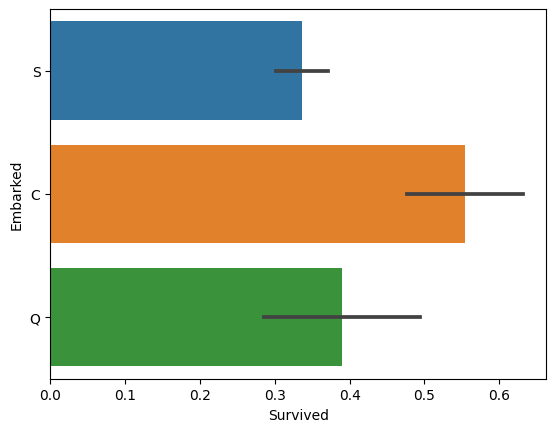

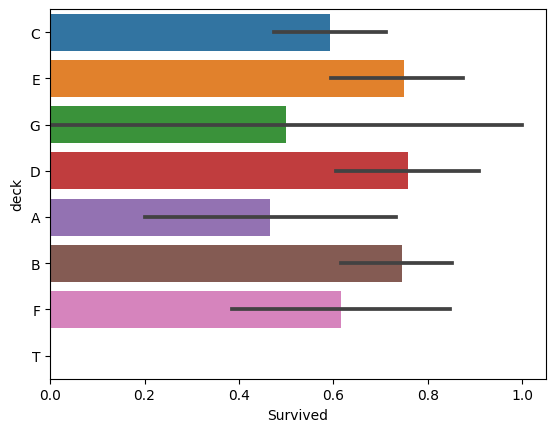

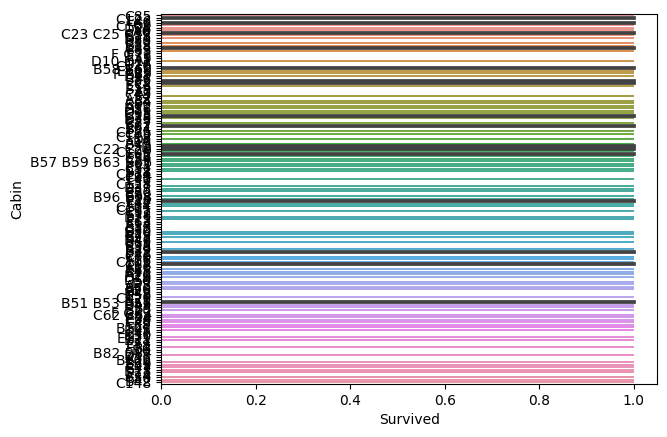

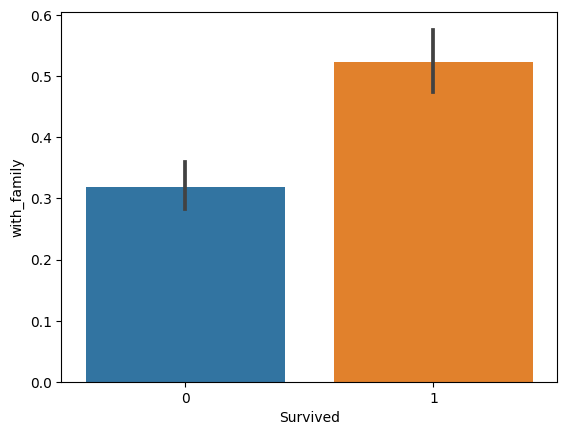

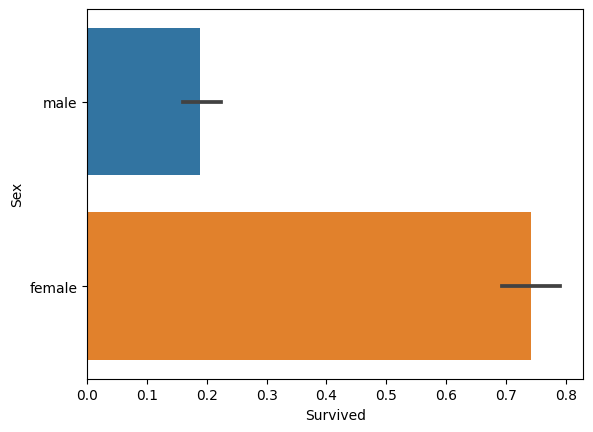

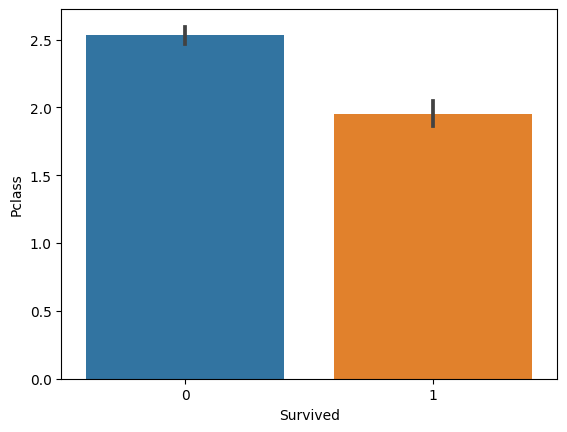

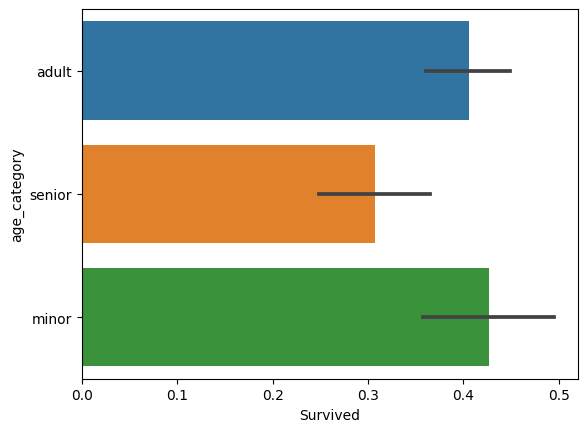

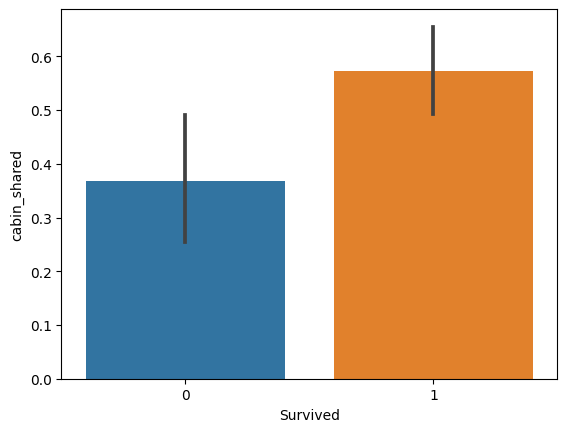

In [147]:
for qualitative in qualitative_variables:
    sns.barplot(data=df, x="Survived", y=qualitative)
    plt.show()

## Multivariate analysis

### Correlation of variables

1] Using the `.corr()` method, find and analyze correlations between features. What can you deduce regarding the use of these two dependent features ?

2] Plot the correlogram and perform a quick analysis of relationship between variables using `sns.pairplot`. Understand graph per graph what is represented and deduce from it the relationship between features and what feature seems to be important for prediction.

### Impact of variables/features on target

The goal of our study is to **predict the target Survived**, so we need to analyze the relationship between this target and the features.

1] Find the statistical repartition of **quantitative variables** (that you should have stored in the variable `quantitative_vars`) for survivors and non-survivors and plot it using `sns.boxplot()`. 

2] Find the statistical repartition of survivors for each **categorical variable** (that you should have stored in the variable `qualitative_vars`) and plot it using the `sns.barplot()` function.

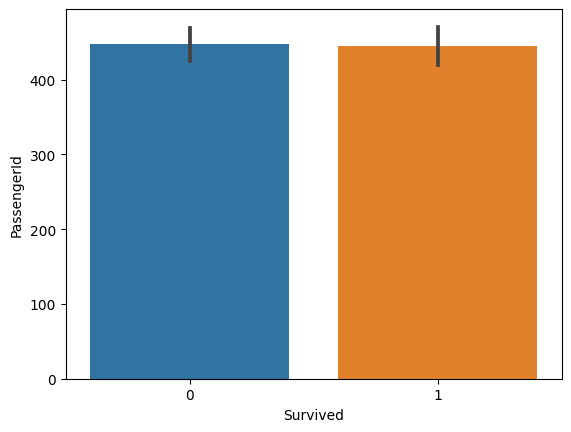

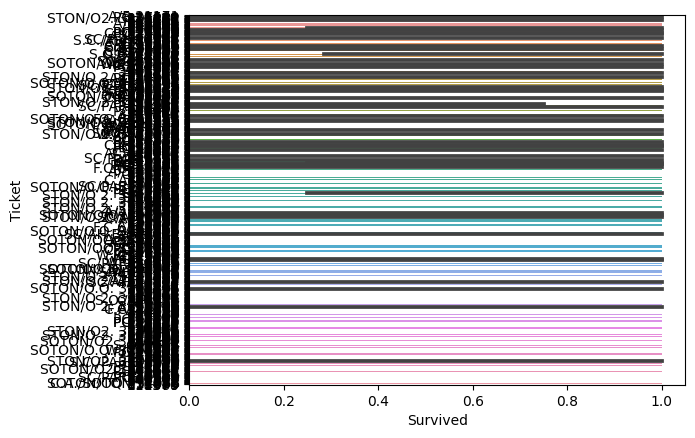

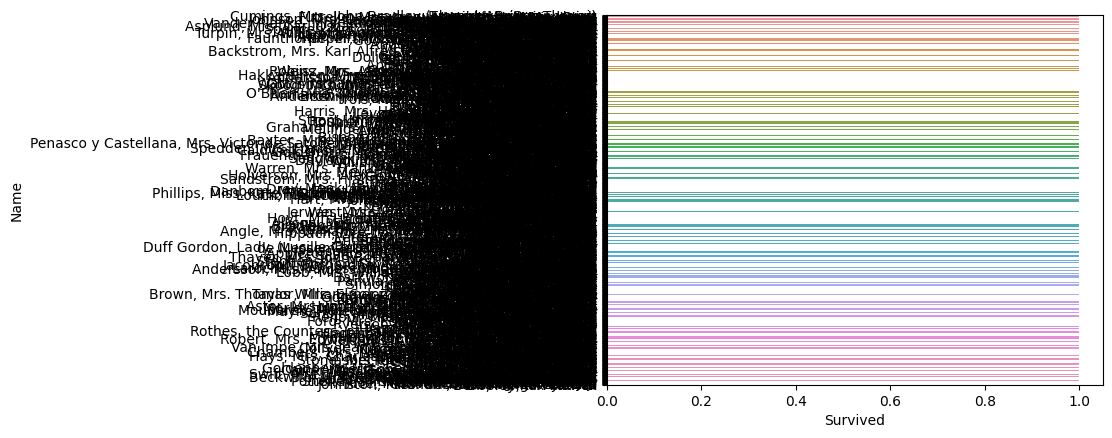

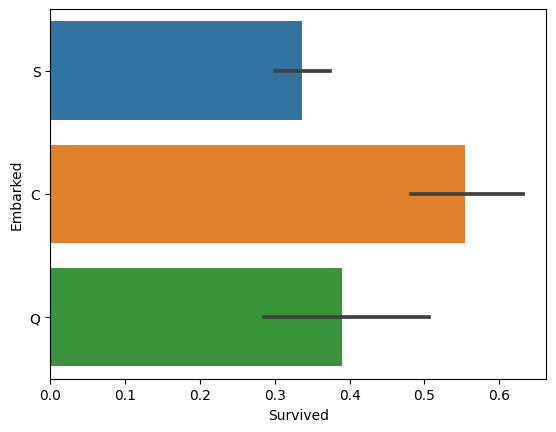

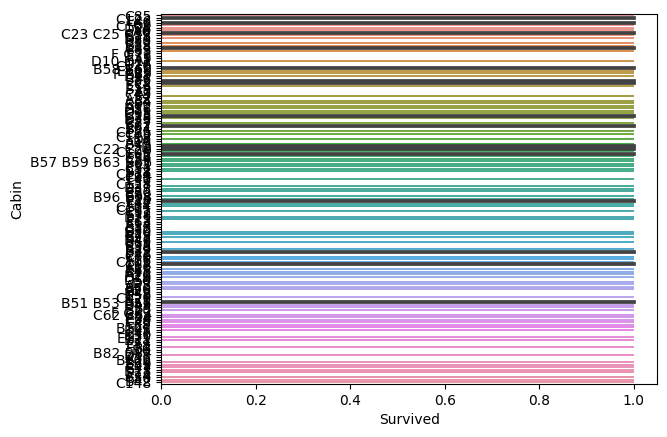

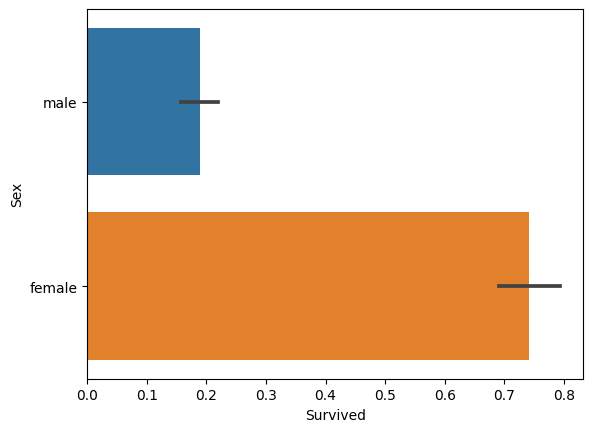

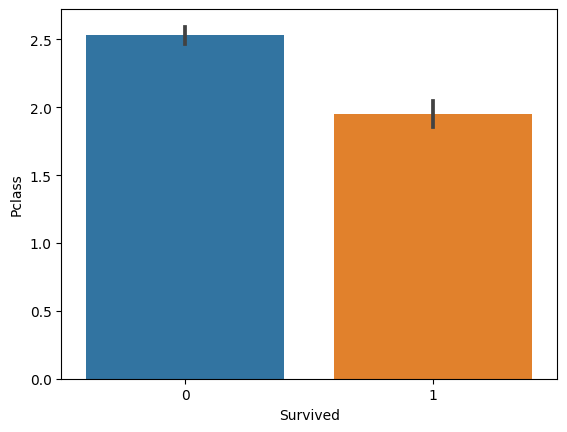

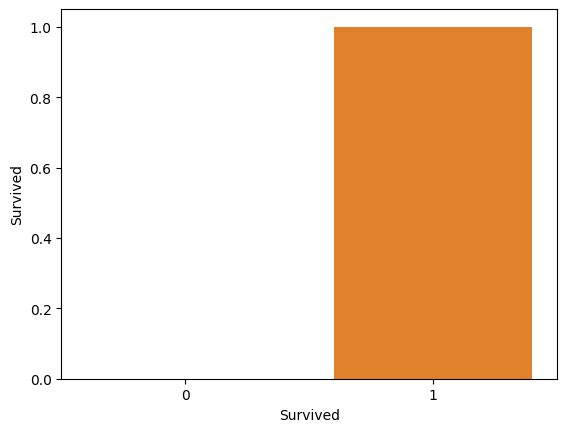

In [149]:
for qualitative in qualitative_variables:
    sns.barplot(data=df, x="Survived", y=qualitative)
    plt.show()

## Dealing with missing values

1. Have you noticed anything in particular with missing values ? 

2. Find rows with missing values using the `df.isna()` method and perform a statistical analysis on the number of missing values.

In [51]:
print(f"Number of passengers with missing age: {df[df.Age.isnull()].shape[0]}")

Number of passengers with missing age: 177


3. Suggest possible ways to deal with missing values and apply it to the data.

## Conclusions and next steps

1. What seems to be the most impacting features in the dataset to predict who survived ?


2. Do you think some metrics could be removed from the dataset without information loss ?


3. What could be some interesting metrics to be created ?


4. Store this new dataset into a csv file `titanic_pre_processed.csv` (using the `to_csv` method) and save it for the next lab.